In this project, I want to find out if there a way to classify if a movie is a success or not success, based on some of the features that are available. The first statement I have is that a movie is a success if the IMBd rating is 7 or above.   
First we load only some of the data, so that it is possible to run the code in the time span that we have. 

In [1]:
import task3_methods as tm
methods = tm.Methods()

File found: ../title.basics.tsv
File found: ../data/title.ratings.tsv


# Bayesian and Probabilistic Modelling  

* Compute posterior probabilities for a parameter in your dataset using the Beta–Binomial model (or another simple conjugate pair).  
* Implement Bayesian regression  

### Beta–Binomial Posterior

Given:
- Prior: $ p \sim \text{Beta}(\alpha, \beta) $
- Likelihood: $ k \sim \text{Binomial}(n, p) $

The posterior is:
$$
p \mid k \sim \text{Beta}(\alpha + k,\; \beta + n - k)
$$

Posterior mean:
$$
E[p \mid k] = \frac{\alpha + k}{\alpha + \beta + n}
$$
  
The first method we are going to use is bayesian and probabalistic modelling, by using a prior distribution for the probability of a rating of 7 or above.  
*IMDb ratings*  
"IMDb registered users can give a rating (from 1 to 10) on every released title in the database. Individual ratings are then aggregated and summarized as a single IMDb rating, visible on the title's main page. By "released title" we mean that the movie (or TV series etc.) must have been shown publicly at least once (including festival screening).

Users can update their ratings as often as they'd like, but any new rating on the same title will overwrite the previous one, so it is one rating per title per user." (IMBD, 2025)  

To arrive at a prior distribution to this, we can use some common sense; If the users are giving a rating between 1 to 10, one can assume that a really terrible movie is rated 1, and the best one is rated 10. The movies are probably equally distributed between the terrible ones and the best ones, and therefore we can assume that the prior is of uniform distribution. Assuming that the ratings are given based on a uniformly distribution, we can approximate that $p_{prior} = P_{uniform}(ratings \ge 7) = \frac39=\frac13$. (Counting the intervals between the numbers. 3 between 7 and 10, and 9 in total).   
Our prior knowledge states that the probability has a beta distribution, and therefore we classify $ \frac \alpha \beta = \frac 12$. The variance that we can use for the prior is not as straightforward. We can have two different options where we assume that we are very confident on one, and less confident on another. We then have two cases.  

$$ 
\alpha_{conf} = 2000, \beta_{conf}=4000
$$
$$
\alpha_{weak} = 10, \beta_{weak} = 20
$$  

  
To clarify; my belief is not very strong, and therefore I should use a prior that is not really "confident", or in other words low $\alpha$ and $\beta$. We then find the posterior by calculating the new beta distribution.  
First we find the mean for over 7 in IMBd from the dataset, without any priors.

In [2]:
methods.print_success_rate()

Successes: 11414, Trials: 21671 and P(success)=0.527


We can see from the results that we probably missed with the $p = 0,33$, because the mean of the data is $E(p_{data})=0,53$

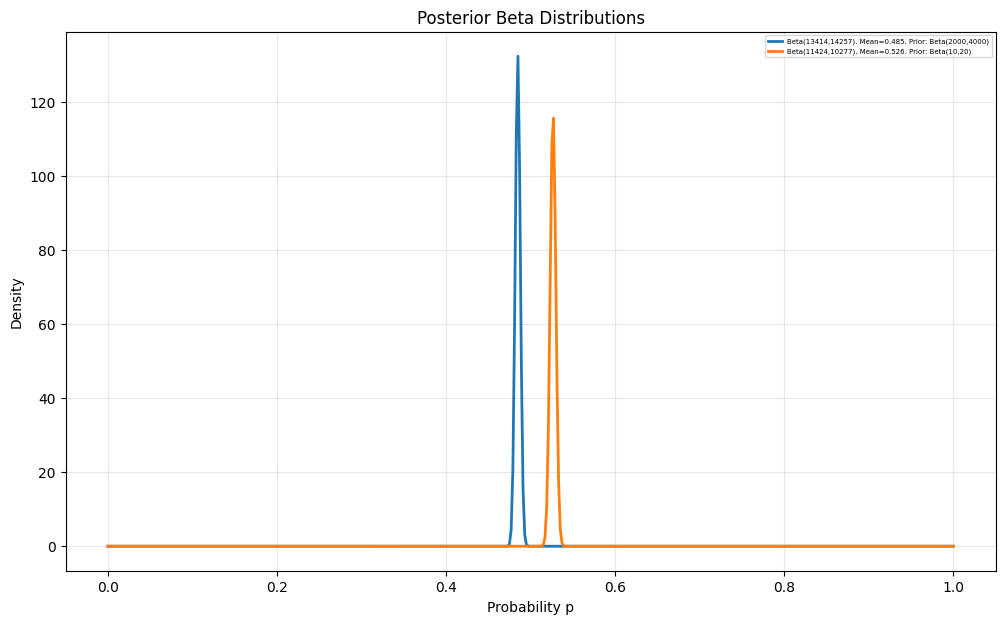

In [3]:
priors = [(2000,4000), (10,20)]


results = methods.compute_posteriors(priors=priors)
methods.plot_posteriors(results)

From the results we can see that the prior with little confidence does not give any noticable difference on the posterior distribution, while the one with a smaller variance is shifting the posterior towards the mean of the prior. This makes sense, as we are using a lot of data points. When we do that, the parameters are almost identical with or without the prior taken into account. We can also see that the pdf is very certain about where $p$ shall lie.

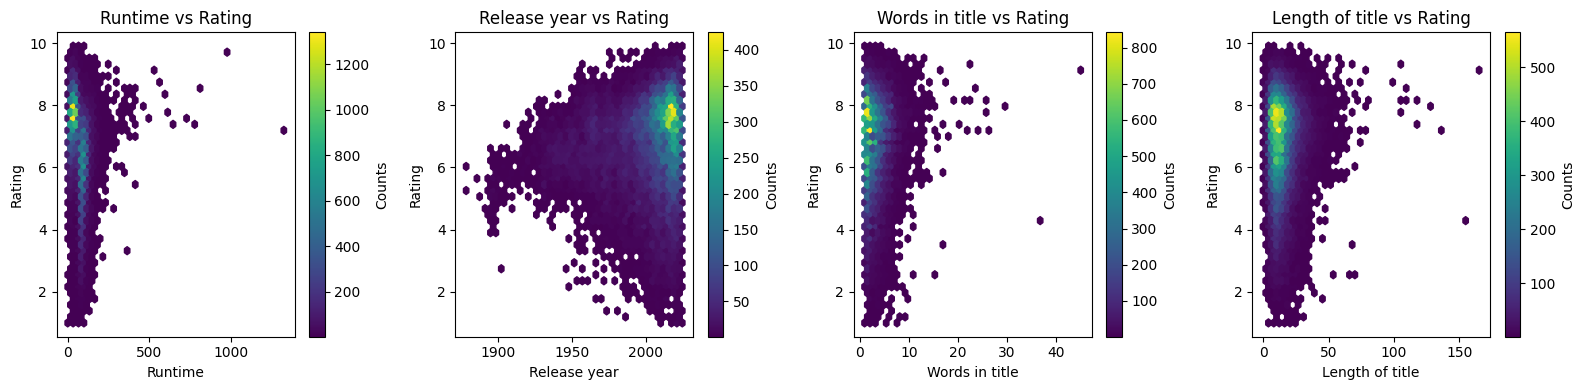

In [2]:
methods.DM.scatter_plots_features_vs_rating()

I want to find the best fit for the C and gamma 

In [3]:
optimized_kernels =methods.create_grid_search()


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for kernel linear: {'C': 0.1}
Best score for kernel linear: 0.7692819047093891
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for kernel rbf: {'C': 10, 'gamma': 0.01}
Best score for kernel rbf: 0.7764227268689133


The code takes really long to run, but I don't think I should remove more of the rows.

In [4]:
trained_models = methods.create_clfs(optimized_kernels)

Training - Kernel: linear
Training - Kernel: rbf


Evaluation Metrics for Kernel: linear:
Accuracy: 0.7668
Precision: 0.7818
Recall: 0.7650


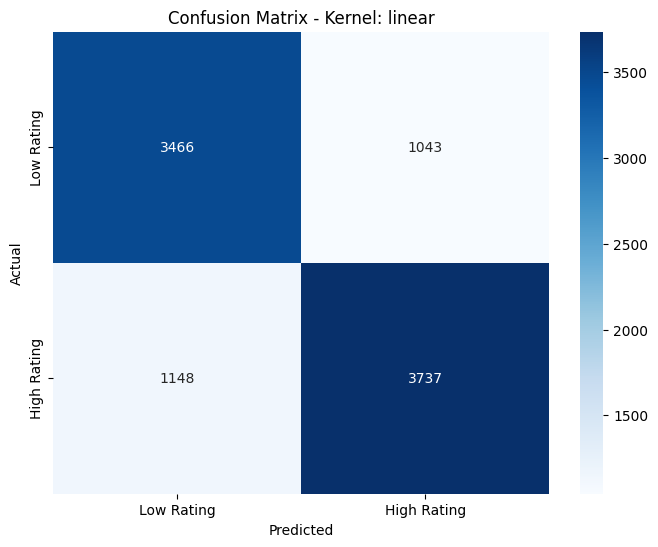

Evaluation Metrics for Kernel: rbf:
Accuracy: 0.7701
Precision: 0.7969
Recall: 0.7486


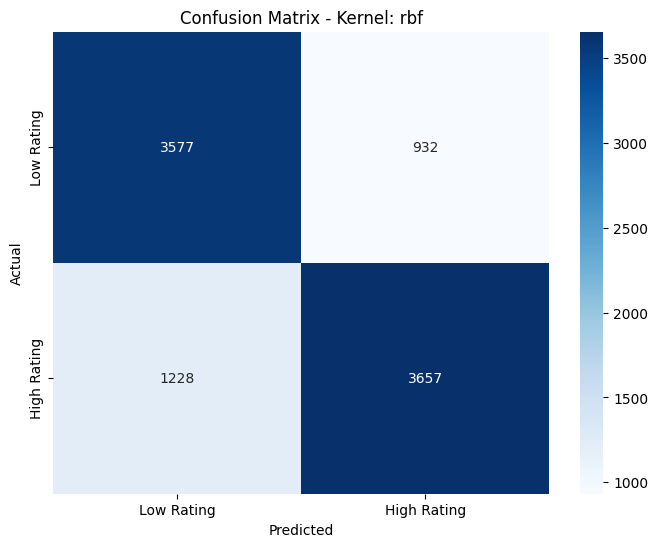

In [5]:
methods.evaluate_models(trained_models)

In [ ]:
beta = methods.linear_regression_multivariate()

In [ ]:
y_pred_reg_test = methods.predict_multivariate(methods.X_test, beta)
y_pred_test = (y_pred_reg_test >= 7).astype(int)


In [ ]:
evaluation_test = methods.eval_parameters(y_pred=y_pred_test, y_true=methods.y_test_bin)

Evaluation Metrics for Multivariate Linear Regression Test Set:
Accuracy: 0.7168
Precision: 0.7915
Recall: 0.6184


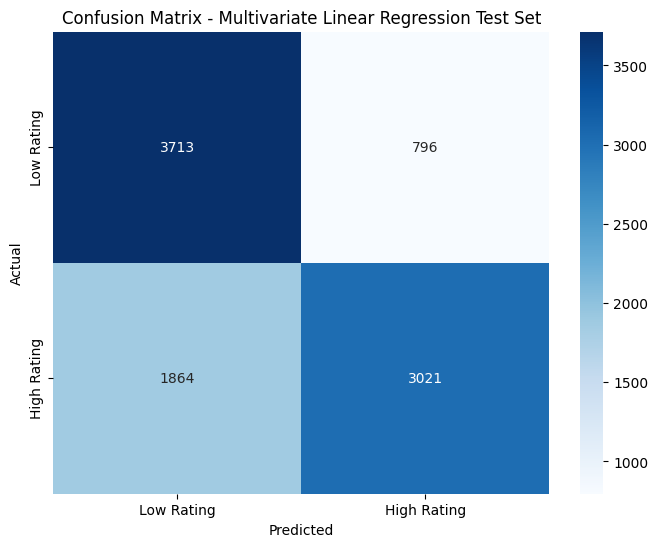

In [ ]:
methods.print_evaluation(*evaluation_test, name="Multivariate Linear Regression Predictor")

In [20]:
activation_functions = ['relu', 'logistic']
for activation in activation_functions:
    nn_model = methods.nn_classifier(hidden_layers=(64, 32), activation=activation, solver='adam')
    y_pred_nn = nn_model.predict(methods.X_test)
    evaluation_nn = methods.eval_parameters(y_pred=y_pred_nn, y_true=methods.y_test_bin)
    methods.print_evaluation(*evaluation_nn, name=f"Neural Network Classifier ({activation} activation)")


AttributeError: 'Methods' object has no attribute 'nn_classifier'

# References  
IMDB. (n.d) Retrieved from: https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#